In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [2]:
# Ignore warnings for penalty='none', since that's what we want for performance comparison. 
import warnings
warnings.filterwarnings('ignore', message="^.*`penalty='none'`.*$")
warnings.filterwarnings('ignore', message="^.*Setting penalty=None will ignore the C and l1_ratio parameters.*$")


# Import Data & Merge into a new dataset


In [3]:
payment_data = pd.read_csv("payment_data.csv")
customer_data = pd.read_csv("customer_data.csv")
df = pd.merge(customer_data,payment_data)


### payment data


In [4]:
print('Payemnt data:\n')
payment_data.info()
print('\nDescribe:')
payment_data.describe()

Payemnt data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB

Describe:


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


### customer data


In [5]:
print('Customer data: \n')
customer_data.info()
print('\nDescribe:')
customer_data.describe()


Customer data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB

Describe:


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


### merged payment & customer data


In [6]:
print('Payemnt & Customer data:\n')
df.info()
print('\nDescribe:')
df.describe()


Payemnt & Customer data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            7222 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   float64
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   i

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8250.000000,8.250000e+03,8250.000000,7222.000000,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,0.168121,5.782173e+07,5.522667,1286.156813,2.319636,1.386712e+05,1.940848,11.013939,4.881091,100.026303,...,153.030672,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,0.373997,1.822724e+06,1.388358,52.002429,0.887414,1.081565e+05,0.235922,2.694611,3.031902,12.540081,...,122.082517,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,0.000000,5.499050e+07,4.000000,1248.500000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,0.000000,5.898905e+07,5.000000,1283.000000,3.000000,1.110000e+05,2.000000,11.000000,5.000000,105.000000,...,184.724119,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,0.000000,5.899655e+07,7.000000,1317.500000,3.000000,1.510000e+05,2.000000,12.000000,5.000000,110.000000,...,220.227156,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,...,707.106781,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [7]:
print('Missing entries in dataset:\n')
df.isnull().sum()

Missing entries in dataset:



label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

# Preprocess


In [8]:
def show_corr_matrix(X):
    corr_matrix = X.corr()
    # use mask for a lower triangular shape.
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20,6))
    ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.6,mask=mask)
    plt.show()

In [9]:
# remove duplicates
# convert string dates into date/time
# create new feature from two dates
# remove old date features

def preprocess(df):
    df.drop_duplicates()
    df.dropna(inplace=True)
    
    df['report_date'] = pd.to_datetime(df['report_date'],format='mixed')
    df['update_date'] = pd.to_datetime(df['update_date'],format='mixed')
    df['report_update_diff'] = (df['update_date'] - df['report_date']).dt.days
    
    df.drop('update_date', axis=1, inplace=True)
    df.drop('report_date', axis=1, inplace=True)

    return df




In [10]:
# plot num of components vs variance 
# show the point where the best Number of Components is at.
# get the best number of components (num that best captures the desired amount of variance)
def set_pca(X):
    X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    pca = PCA()
    pca.fit(X_std)

    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('num of components')
    plt.ylabel('variance')

    variance_threshold = 0.95
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    
    plt.axvline(x=num_components, color='k', linestyle='--')
    plt.text(num_components + 0.5, variance_threshold - 0.05, f'{variance_threshold*100}% threshold', fontsize=10)

    plt.show()
    
    return num_components
    

In [11]:
df1 = preprocess(df)

In [12]:
X = df1.drop(['label'], axis=1)
y = df1['label']

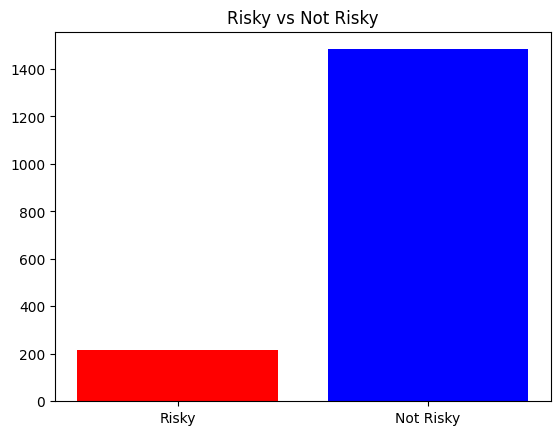

In [13]:
risky = (y == 1).sum()
not_risky = len(y)-risky
#print(risky, not_risky)
fig, ax = plt.subplots()
ax.bar(["Risky", "Not Risky"], [risky, not_risky],color=["red","blue"])
ax.set_title("Risky vs Not Risky")
plt.show()

# Split into: train, val, test and train_val

In [14]:
def visualize_split(sets, labels):
    sizes = [len(s) for s in sets]
    colors = [tuple(np.random.rand(3)) for _ in range(len(sets))]
    plt.pie(sizes, labels=labels, colors=colors, autopct='%2.2f%%', startangle=90)
    plt.title('Data Split')
    plt.axis('equal')
    plt.show()


In [15]:
def split(X,y,test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=test_size, random_state=42)
    
    print("X_train", X_train.shape, "y_train", y_train.shape)
    print("X_val",X_val.shape, "y_val", y_val.shape)
    print("X_train_val",X_train_val.shape, "y_train_val", y_train_val.shape)
    print("X_test",X_test.shape, "y_test",y_test.shape)
    

    return X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val


X_train (1085, 22) y_train (1085,)
X_val (272, 22) y_val (272,)
X_train_val (1357, 22) y_train_val (1357,)
X_test (340, 22) y_test (340,)

Correlation matrix for unscaled X_train



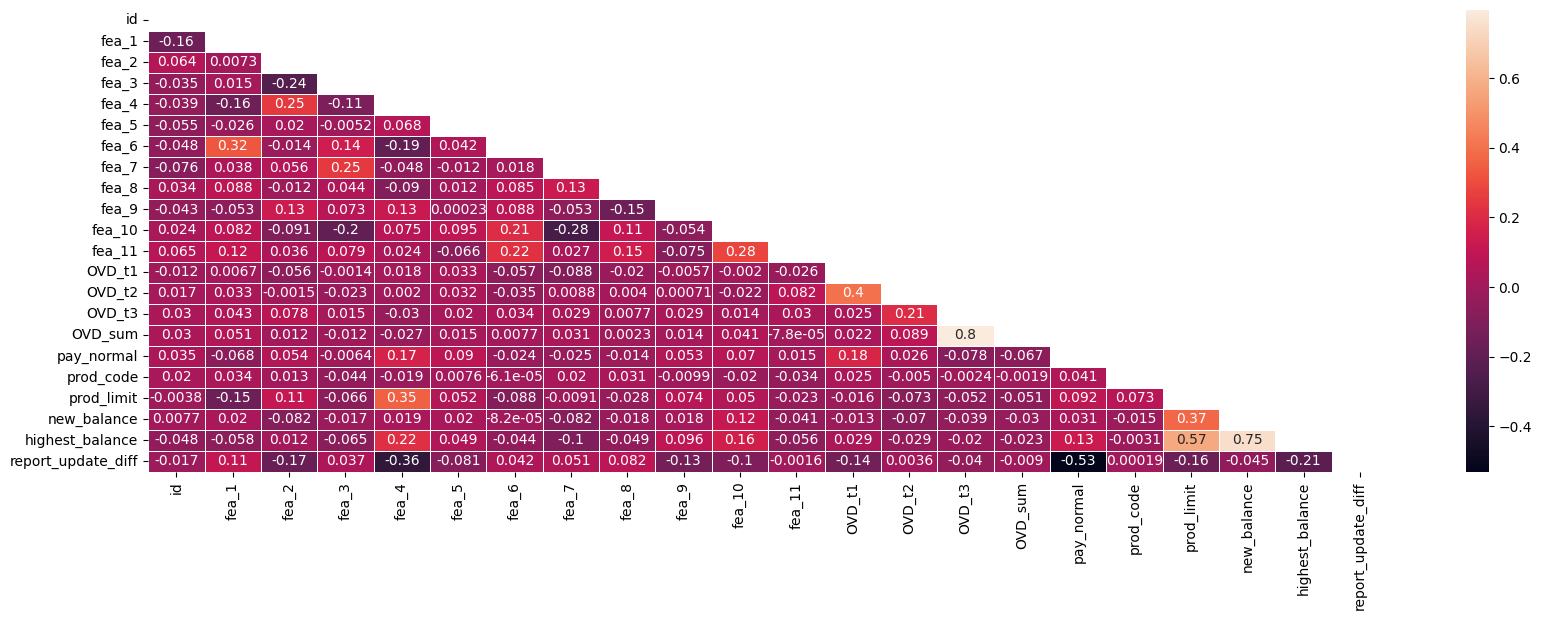

In [16]:
# unscaled X
X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val = split(X,y, 0.2) 

print("\nCorrelation matrix for unscaled X_train\n")
show_corr_matrix(X_train)

In [17]:
# standard scaled X
standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_train_val_scaled = standard_scaler.transform(X_train_val)
X_test_scaled = standard_scaler.transform(X_test)


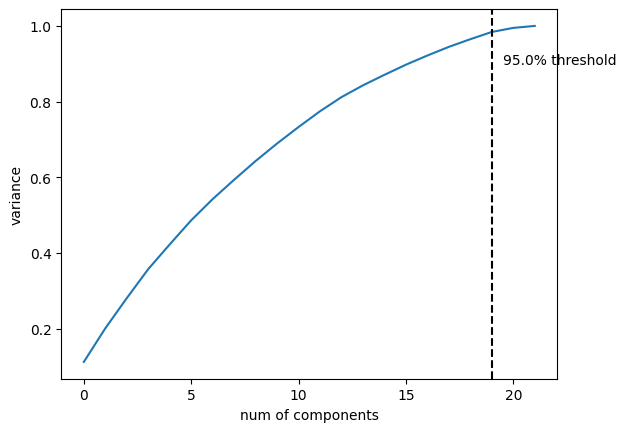

In [18]:
# PCA X
n = set_pca(X) 
pca = PCA(n) 

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
X_train_val_pca = pca.transform(X_train_val)



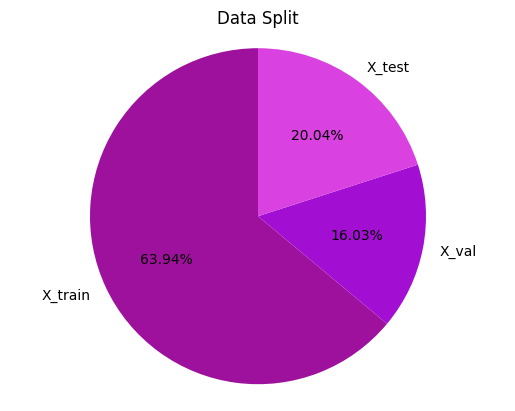

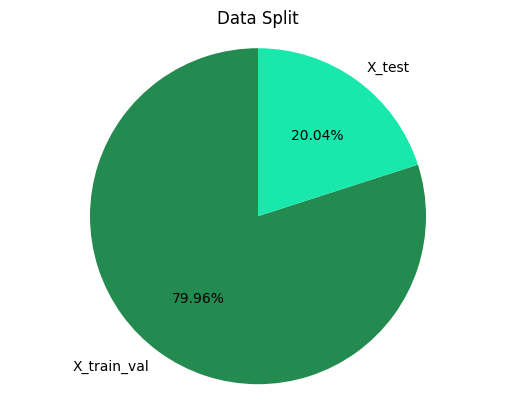

In [19]:
visualize_split([X_train, X_val, X_test],["X_train","X_val","X_test"])
visualize_split([X_train_val, X_test],["X_train_val","X_test"])


# Fit & Evaluate
#### Use train set to train a model.
#### Use validation set to select the best hyperparameter, C. 
#### Use train_validation to train the final model with the best C.
#### Evaluate performance of the final model on the test set.

In [20]:
C_range = np.logspace(np.log10(1e-5), np.log10(1e5), num=3)

penalties={'none':'saga', 
           'l1':'liblinear', 
           'l2':'lbfgs'}


max_iter = 10000 # increase if failed to converge 


In [21]:
def train_logistic_regression(X_train, y_train, penalty, solver, C,max_iter):
    clf = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter)
    clf.fit(X_train, y_train)
    return clf

In [22]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"Test accuracy: {acc}")
    print(classification_report(y, y_pred, zero_division=0))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')


In [23]:
def logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, C_range, penalties,max_iter):
    best_acc = 0
    best_model = None
    best_C = None
    best_penalty = None
    
    for penalty in penalties.keys():
        for C in C_range:
            solver=penalties.get(penalty)
            clf = train_logistic_regression(X_train, y_train,penalty,solver, C,max_iter)
            acc = clf.score(X_val, y_val)
            print(f"Penalty: {penalty}, Solver: {solver}, C: {C}, Validation accuracy: {acc} \n")
            if acc > best_acc:
                best_acc = acc
                best_model = clf
                best_C = C
                best_penalty = penalty
            
    print(f"Best Penalty: {best_penalty}\nBest Solver: {best_model.solver}\nBest C: {best_C}\nBest overall validation accuracy: {best_acc}\n")
    
#     evaluate_model(best_model, X_train_val, y_train_val, "Train+Validation")
    evaluate_model(best_model, X_test, y_test)

## Compare Performance of Models 


In [ ]:
# unscaled 
logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test, X_train_val, y_train_val, C_range, penalties,max_iter=max_iter)


Penalty: none, Solver: saga, C: 1e-05, Validation accuracy: 0.8566176470588235 

Penalty: none, Solver: saga, C: 1.0, Validation accuracy: 0.8566176470588235 

Penalty: none, Solver: saga, C: 100000.0, Validation accuracy: 0.8566176470588235 

Penalty: l1, Solver: liblinear, C: 1e-05, Validation accuracy: 0.8566176470588235 



In [ ]:
# standard scaled 
logistic_regression(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, X_train_val_scaled, y_train_val, C_range, penalties,max_iter=max_iter)


In [ ]:
# PCA 
logistic_regression(X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test, X_train_val_pca, y_train_val, C_range, penalties,max_iter=max_iter)
